In [106]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [107]:
import warnings

warnings.filterwarnings('ignore')

In [108]:
df = pd.read_csv('./Live_20210128.csv')

In [109]:
df.shape

(7050, 16)

In [110]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [112]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [113]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   int64 
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 661.1+ KB


In [115]:
df.describe()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,3525.500000,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,2035.304031,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1763.250000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3525.500000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5287.750000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,7050.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [116]:
df['status_id'].unique()

array([   1,    2,    3, ..., 7048, 7049, 7050])

In [117]:
# view how many different types of variables are there

len(df['status_id'].unique())

7050

In [118]:
# view the labels in the variable

df['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

In [119]:
# view how many different types of variables are there

len(df['status_published'].unique())

6913

In [120]:
# view the labels in the variable

df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [121]:
# view how many different types of variables are there

len(df['status_type'].unique())

4

In [122]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [124]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [125]:
X = df

y = df['status_type']

In [126]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['status_type'] = le.fit_transform(X['status_type'])

y = le.transform(y)

In [127]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int64
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int64(10)
memory usage: 550.9 KB


In [128]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [129]:
cols = X.columns

In [130]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [131]:
X = pd.DataFrame(X, columns=[cols])

In [132]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [133]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [134]:
kmeans.cluster_centers_

array([[3.28506857e-01, 3.90710874e-02, 7.54854864e-04, 7.53667113e-04,
        3.85438884e-02, 2.17448568e-03, 2.43721364e-03, 1.20039760e-03,
        2.75348016e-03, 1.45313276e-03],
       [9.54921576e-01, 6.46330441e-02, 2.67028654e-02, 2.93171709e-02,
        5.71231462e-02, 4.71007076e-02, 8.18581889e-03, 9.65207685e-03,
        8.04219428e-03, 7.19501847e-03]])

In [135]:
kmeans.inertia_

237.75726404419558

In [136]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 63 out of 7050 samples were correctly labeled.


In [137]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.01


In [138]:
kmeans.labels_

array([1, 0, 1, ..., 0, 0, 0], dtype=int32)

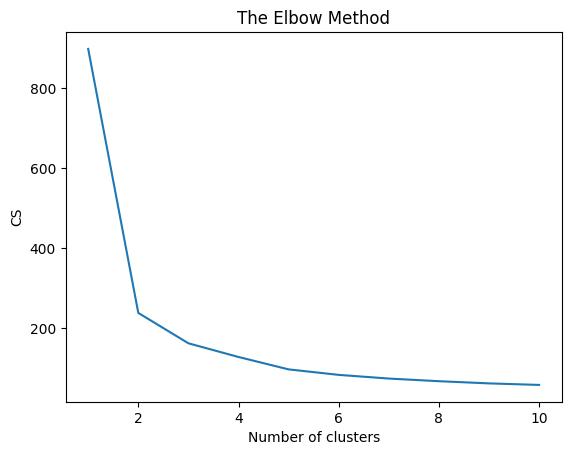

In [139]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

k=3

In [140]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 138 out of 7050 samples were correctly labeled.
Accuracy score: 0.02


k=4

In [141]:
kmeans = KMeans(n_clusters=4, random_state=0)

kmeans.fit(X)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4340 out of 7050 samples were correctly labeled.
Accuracy score: 0.62


legend

In [142]:
x = np.array(X)
kmeans_model = KMeans(n_clusters=4, random_state=0)
kmeans_predict = kmeans_model.fit_predict(x)
df['cluster'] = kmeans_predict

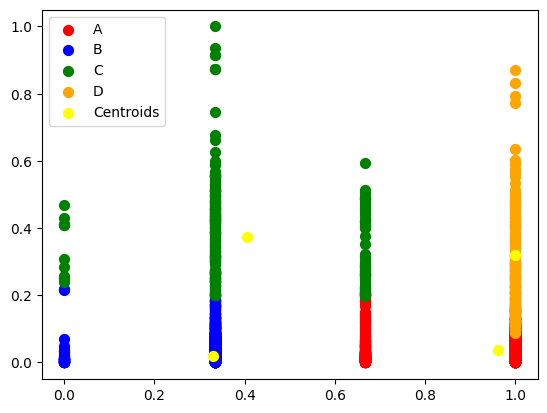

In [143]:
# Visualising the clusters
plt.scatter(x[kmeans_predict == 0, 0], x[kmeans_predict == 0, 1], s = 50, c = 'red', label = 'A')
plt.scatter(x[kmeans_predict == 1, 0], x[kmeans_predict == 1, 1], s = 50, c = 'blue', label = 'B')
plt.scatter(x[kmeans_predict == 2, 0], x[kmeans_predict == 2, 1], s = 50, c = 'green', label = 'C')
plt.scatter(x[kmeans_predict == 3, 0], x[kmeans_predict == 3, 1], s = 50, c = 'orange', label = 'D')
# Plotting the centroids of the clusters
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:,1], s = 50, c = 'yellow', label = 'Centroids')
plt.legend()

In [144]:
X = X.iloc[:,1:]

In [145]:
x = np.array(X)
kmeans_model = KMeans(n_clusters=4, random_state=0)
kmeans_predict = kmeans_model.fit_predict(x)
df['cluster'] = kmeans_predict

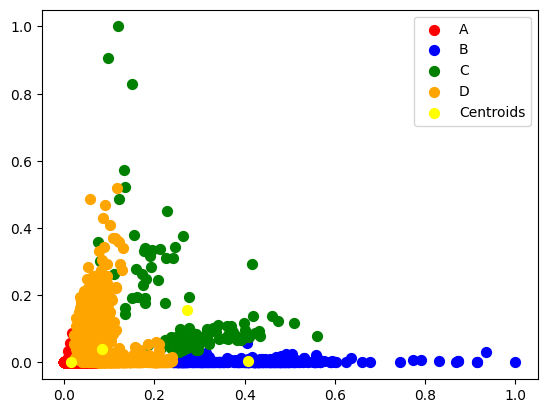

In [146]:
# Visualising the clusters
plt.scatter(x[kmeans_predict == 0, 0], x[kmeans_predict == 0, 1], s = 50, c = 'red', label = 'A')
plt.scatter(x[kmeans_predict == 1, 0], x[kmeans_predict == 1, 1], s = 50, c = 'blue', label = 'B')
plt.scatter(x[kmeans_predict == 2, 0], x[kmeans_predict == 2, 1], s = 50, c = 'green', label = 'C')
plt.scatter(x[kmeans_predict == 3, 0], x[kmeans_predict == 3, 1], s = 50, c = 'orange', label = 'D')
# Plotting the centroids of the clusters
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:,1], s = 50, c = 'yellow', label = 'Centroids')
plt.legend()